In [1]:
import sys, os
sys.path.append("..")  # so Python can see src1

from src1.PINN import train


In [2]:
model = train(epochs=2000, N=400, lr=1e-3)


Epoch 0 loss=5.5671e-02
Epoch 200 loss=6.6499e-05
Epoch 400 loss=2.8675e-05
Epoch 600 loss=1.9510e-05
Epoch 800 loss=3.1426e-05
Epoch 1000 loss=3.7664e-06
Epoch 1200 loss=3.7189e-06
Epoch 1400 loss=2.3221e-06
Epoch 1600 loss=5.8129e-06
Epoch 1800 loss=2.6700e-06


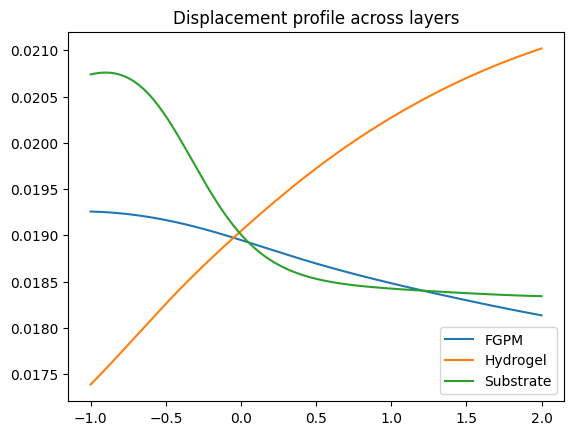

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from src1.model import PINN

xs = np.linspace(-1,2,300)   # goes across all layers
ys = np.zeros_like(xs)
ts = np.zeros_like(xs)

inp = torch.tensor(np.stack([xs,ys,ts],axis=1)).float()

with torch.no_grad():
    out = model(inp)

w1 = out[:,0].numpy()
w2 = out[:,2].numpy()
w3 = out[:,4].numpy()

plt.plot(xs, w1, label="FGPM")
plt.plot(xs, w2, label="Hydrogel")
plt.plot(xs, w3, label="Substrate")
plt.legend()
plt.title("Displacement profile across layers")
plt.show()


In [ ]:
import torch
import numpy as np

def estimate_k(model, x_level=0.2, t=0.0, npts=400):

    y = torch.linspace(0, 5, npts).reshape(-1,1)
    x = torch.full_like(y, x_level)
    t = torch.full_like(y, t)

    with torch.no_grad():
        out = model(torch.cat([x,y,t], dim=1))
        w = out[:,0].numpy()   # use w1 (top layer)

    w = w - np.mean(w)

    U = np.fft.rfft(w)
    freqs = np.fft.rfftfreq(len(w), d=(y[1]-y[0]).item())

    k_index = np.argmax(np.abs(U[1:])) + 1
    k = 2*np.pi*freqs[k_index]

    return abs(k)

# You can change out[:,0] to [:,2] or [:,4] if you want hydrogel or substrate.